## Two Sample TTest
- what is two sample test
- what is control, treatment group
- implementation of two sample ttest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

### what is two sample test

In [2]:
# two sample t test is used to determine if two population means are equal.
# e.g if the treatment is better than the population without treatment

### what is control and treatment group

In [3]:
# control - the group been given placebo
# treatment - the group been given treatment

### implementation

In [4]:
control = np.array([166, 165, 120,  94, 104, 166,  98,  85,  97,  87, 114, 100, 152,
                    87, 152, 102,  82,  80,  84, 109,  98, 154, 135, 164, 137, 128,
                    122, 146,  86, 146,  85, 101, 109, 105, 163, 136, 142, 144, 140,
                    128, 126, 119, 121, 126, 169,  87,  97, 167,  89, 155])

experimental = np.array([ 83, 100, 123,  75, 130,  77,  78,  87, 116, 116, 141,  93, 107,
                         101, 142, 152, 130, 123, 122, 154, 119, 149, 106, 107, 108, 151,
                         97,  95, 104, 141,  80, 110, 136, 134, 142, 135, 111,  83,  86,
                         116,  86, 117,  87, 143, 104, 107,  86,  88, 124,  76])

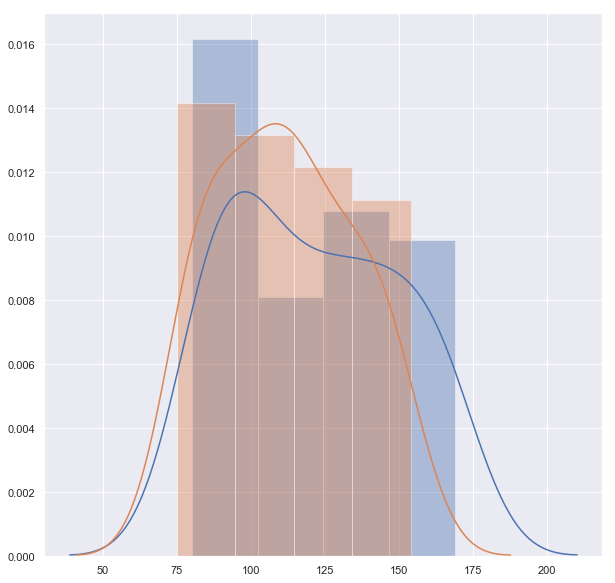

In [8]:
# check if normal
sns.set(color_codes=True)
sns.set(rc={'figure.figsize': (10,10)})
sns.distplot(control)
sns.distplot(experimental)

#### the means and standard deviation are different, but are the difference significant?
- one: null and alternative hypotheses
- two: choose a significance level
- three: compute test statistis
- four: determine the critical or p value
- five: compare t-value with critial t-value to reject or fail to reject the null hypothesis

In [5]:
def cal_samp_var(sample):
    
    sample_mean = np.mean(sample)
    return np.sum((sample - sample_mean) **2) / (len(sample) - 1)

def cal_pool_var(sample_one, sample_two):
    
    size_one = len(sample_one)
    size_two = len(sample_two)
    
    var_one = cal_samp_var(sample_one)
    var_two = cal_samp_var(sample_two)
    
    pool_var = ((size_one - 1) * var_one + (size_two - 1) * var_two) / ((size_one - 1) + (size_two - 1))
    
    return pool_var

In [11]:
def two_sample_ttest(pop_one: np.array, pop_two: np.array):
    """this is a good docstring."""
    pop_one_mean = np.mean(pop_one)
    pop_two_mean = np.mean(pop_two)
    
    pool_var = cal_pool_var(pop_one, pop_two)
    
    num_one, num_two = len(pop_one), len(pop_two)
    
    num = pop_one_mean - pop_two_mean
    denom = np.sqrt(pool_var*((1/num_one) + (1/num_two)))

    return num/denom

In [8]:
t_test = two_sample_ttest(experimental, control)
t_test

-1.8915462966190273

#### is the test statistic im seeing here is due to random chance?

In [34]:
def evaluate(t_test, n_control, n_experimental):
    
    fig, ax = plt.subplots(figsize=(10,10))
    xs = np.linspace(-4,4,500)
    ys = stats.t.pdf(xs, (n_control + n_experimental - 2), 0, 1)
    
    ax.plot(xs, ys, linewidth=3, color='darkred')
    
    ax.axvline(t_test, color='black', linestyle='--', lw=5)
    ax.axvline(-t_test, color='black', linestyle='--', lw=5)
    
    return

def cal_p_value(t_test, n_control, n_experimental):
    
    lower_tail = stats.t.cdf(t_test, (n_control + n_experimental - 2), 0, 1)
    upper_tail = 1 - stats.t.cdf(-t_test, (n_control + n_experimental - 2), 0, 1)
    
    p_value = lower_tail + upper_tail
    
    return p_value

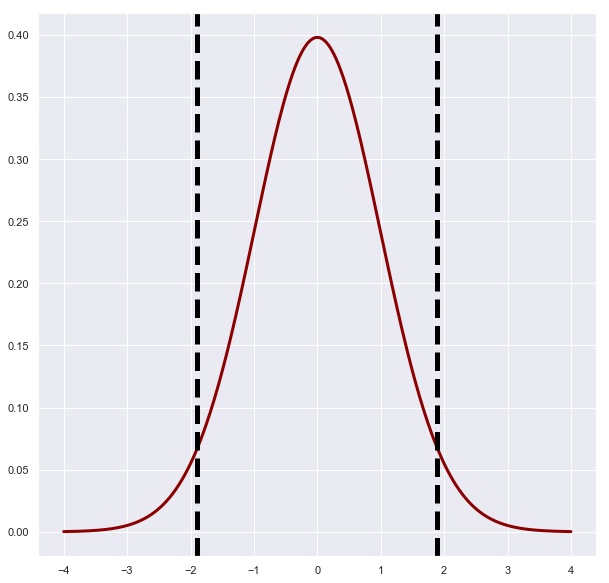

In [31]:
n_control = len(control)
n_experimental = len(experimental)
evaluate(t_test, n_control, n_experimental)

In [35]:
p_value = cal_p_value(t_test, n_control, n_experimental)
p_value

0.06150424067253037

#### verify p value using scipy
-  Calculates the T-test for the means of *two independent* samples of scores.
- This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. 
- This test assumes that the populations have identical variances by default

In [37]:
stats.ttest_ind(experimental, control)

Ttest_indResult(statistic=-1.8915462966190273, pvalue=0.061504240672530394)